<a href="https://colab.research.google.com/github/Bwacha2099/Oasis_Internship/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Load the dataset
df = pd.read_csv("Iris.csv")

In [9]:
# Drop the 'Id' column
df = df.drop(columns=["Id"])

In [10]:
# Encode the 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Split the data into features and target
X = df.drop(columns=["Species"])
Y = df['Species']

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(report)
    print("\n")


Model: Logistic Regression
Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Model: K-Nearest Neighbors
Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Model: Decision Tree
Accuracy: 100.00%
                 precision    recall  f1-score   support

    I

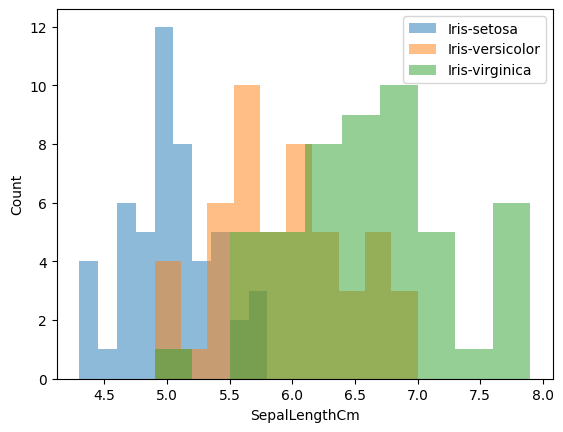

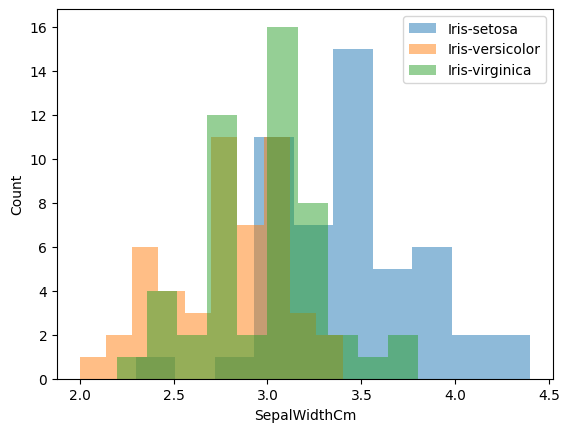

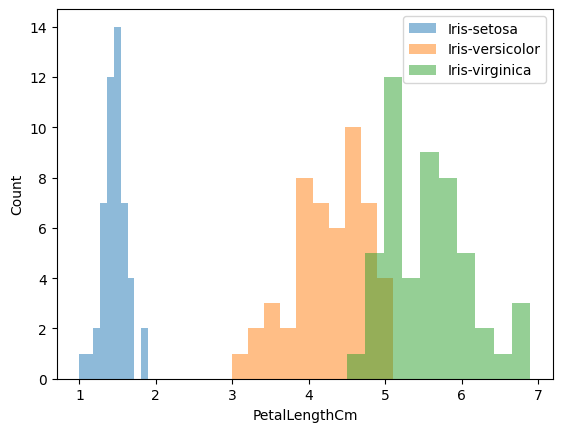

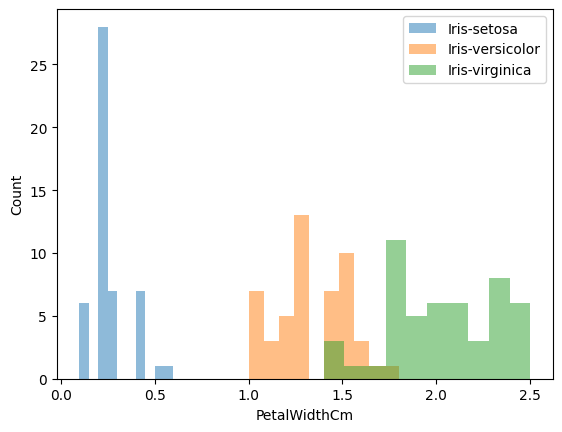

In [13]:
# Plot histograms
feature_names = X.columns
for feature in feature_names:
    plt.hist(df[df['Species'] == 0][feature], alpha=0.5, label='Iris-setosa')
    plt.hist(df[df['Species'] == 1][feature], alpha=0.5, label='Iris-versicolor')
    plt.hist(df[df['Species'] == 2][feature], alpha=0.5, label='Iris-virginica')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

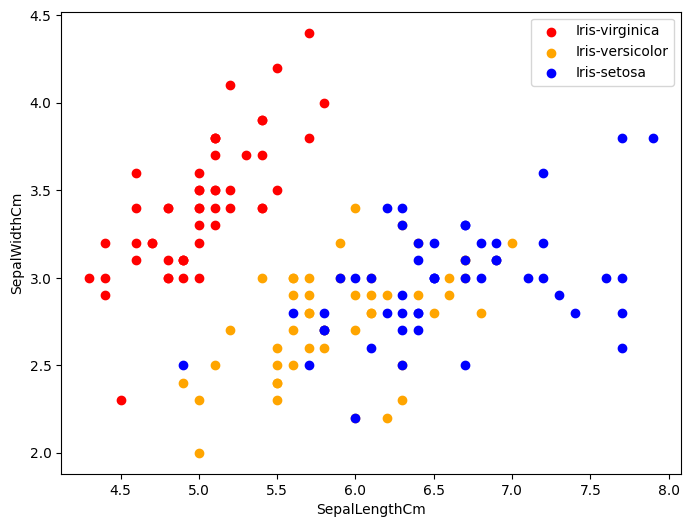

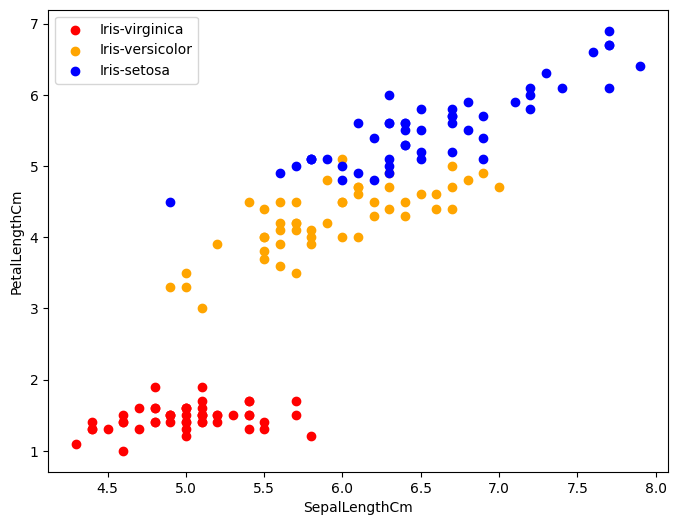

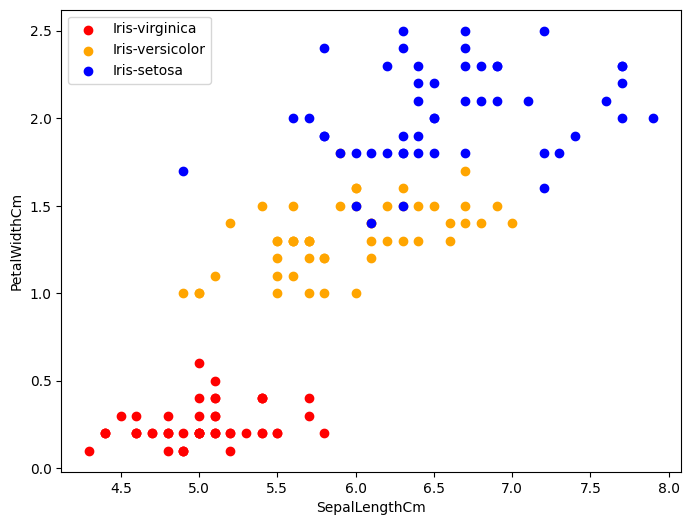

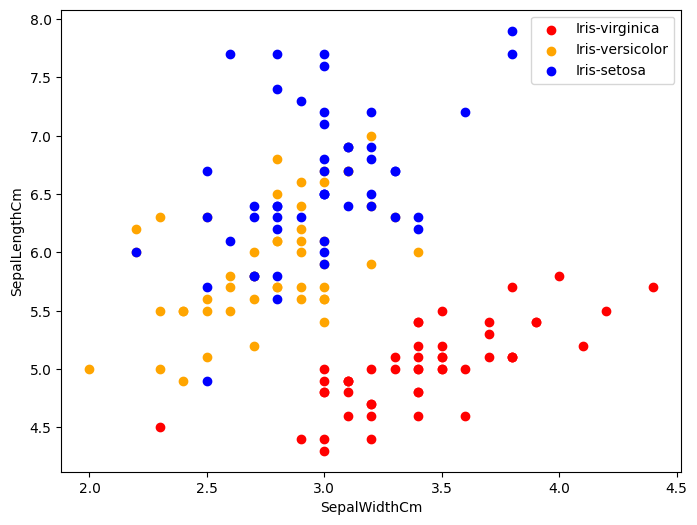

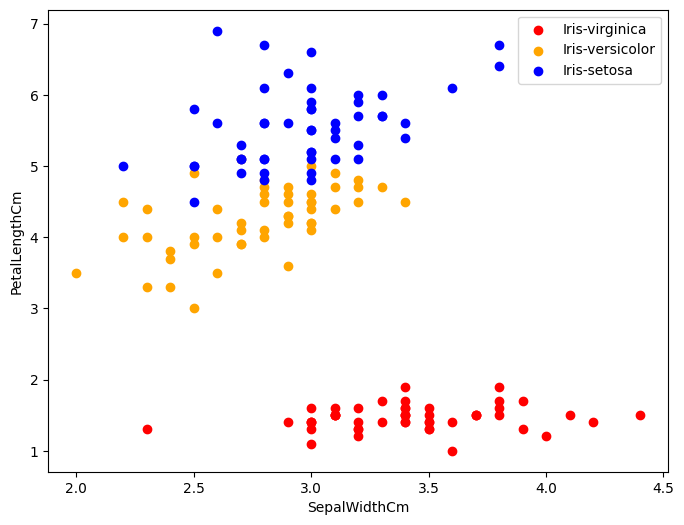

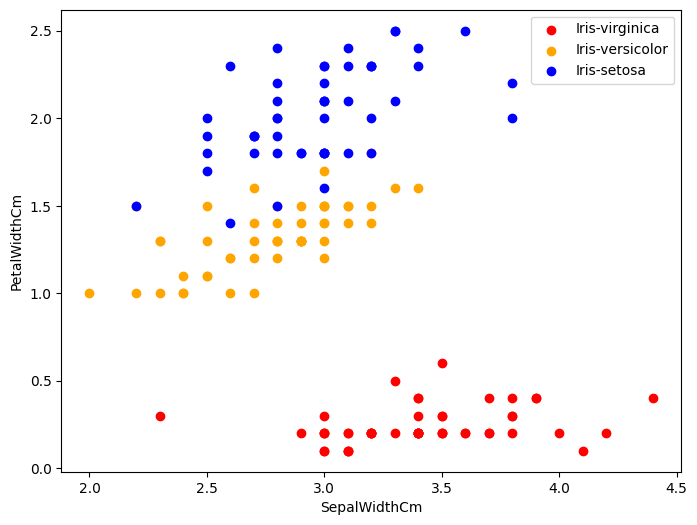

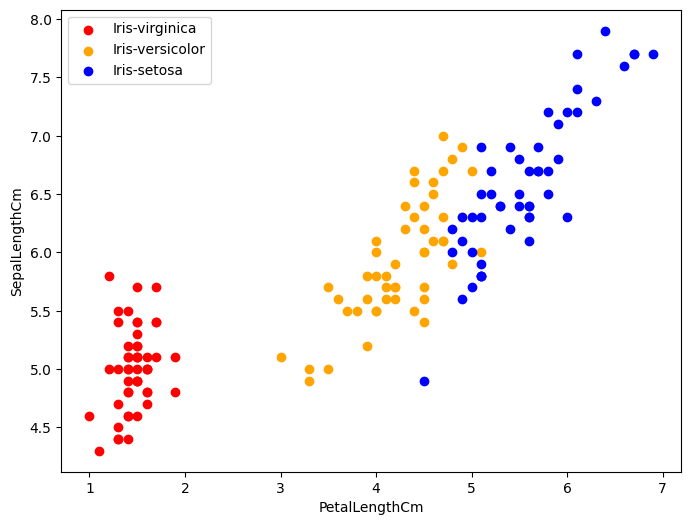

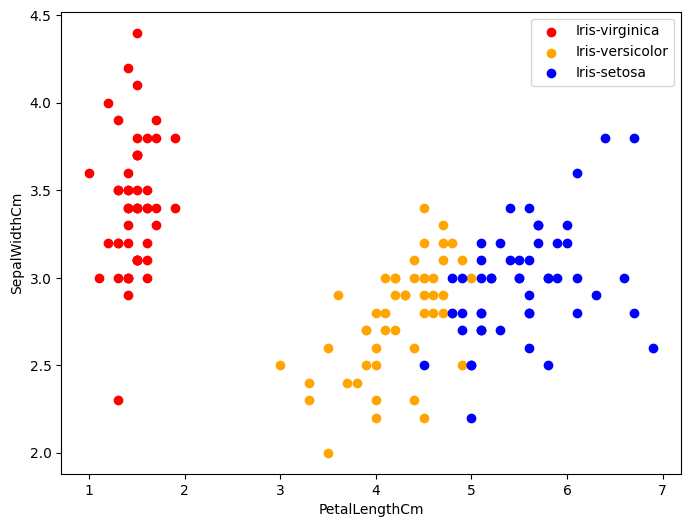

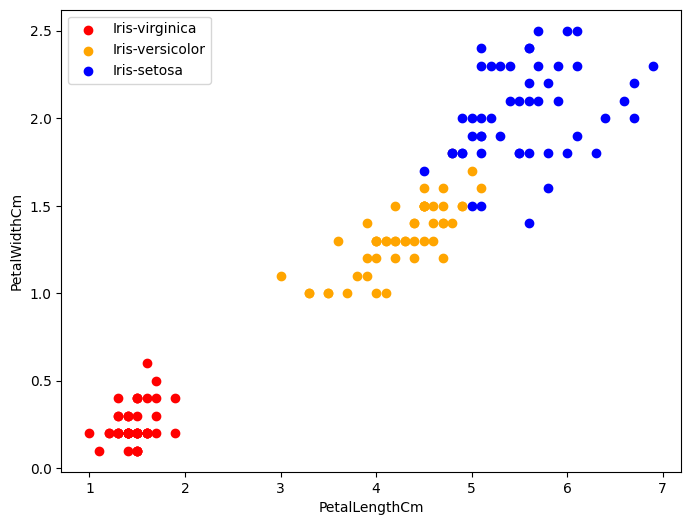

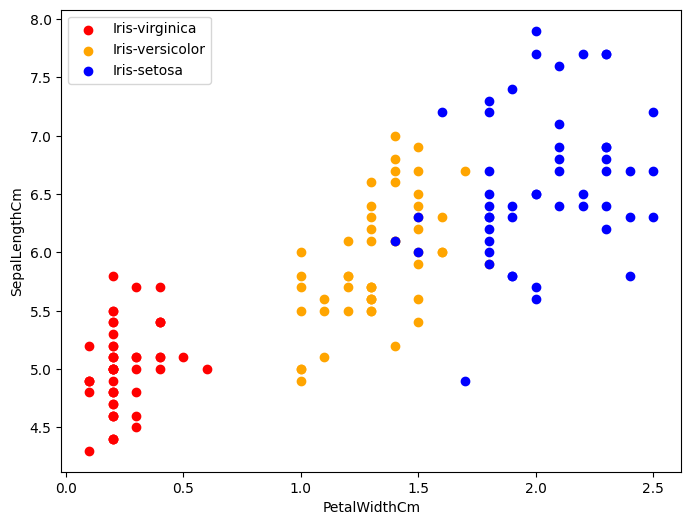

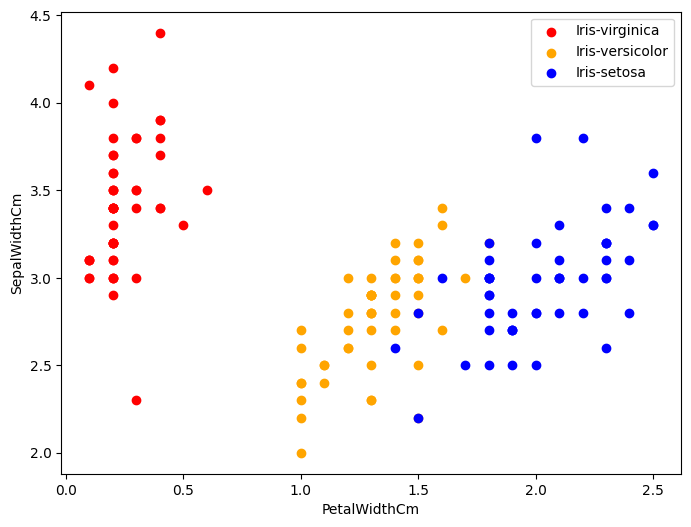

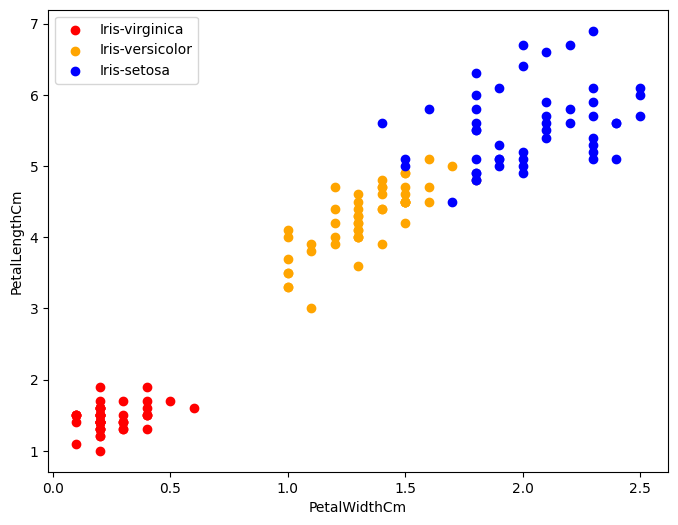

In [14]:
# Scatter plots
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for feature1 in feature_names:
    for feature2 in feature_names:
        if feature1 != feature2:
            plt.figure(figsize=(8, 6))
            for i in range(3):
                x = df[df['Species'] == i]
                plt.scatter(x[feature1], x[feature2], c=colors[i], label=species[i])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
            plt.show()